In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [12]:
data=pd.read_csv('/content/drive/MyDrive/edunet/Copy of employee_burnout_analysis(1).csv')


FileNotFoundError: ignored

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.shape

(22750, 9)

In [ ]:
data.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,30-09-2008,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,30-11-2008,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,10-03-2008,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,03-11-2008,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,24-07-2008,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data['Date of Joining']=pd.to_datetime(data['Date of Joining'])


In [ ]:
data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,fffe31003300320037003900,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,fffe32003400380032003900,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Employee ID           22750 non-null  object        
 1   Date of Joining       22750 non-null  datetime64[ns]
 2   Gender                22750 non-null  object        
 3   Company Type          22750 non-null  object        
 4   WFH Setup Available   22750 non-null  object        
 5   Designation           22750 non-null  int64         
 6   Resource Allocation   21369 non-null  float64       
 7   Mental Fatigue Score  20633 non-null  float64       
 8   Burn Rate             21626 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 1.6+ MB


In [ ]:
data.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate'],
      dtype='object')

In [ ]:
data.isna().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [ ]:
for i,col in enumerate(data.columns):
  print(f"\n\n{data[col].unique()}")
  print(f"\n{data[col].value_counts()}\n\n")



['fffe32003000360033003200' 'fffe3700360033003500'
 'fffe31003300320037003900' ... 'fffe390032003000'
 'fffe33003300320036003900' 'fffe3400350031003800']

fffe32003000360033003200    1
fffe3600360035003500        1
fffe3800360034003400        1
fffe31003000310033003600    1
fffe31003400350031003700    1
                           ..
fffe33003400340032003400    1
fffe32003100370036003600    1
fffe31003900310035003800    1
fffe32003400320034003200    1
fffe3400350031003800        1
Name: Employee ID, Length: 22750, dtype: int64




['2008-09-30T00:00:00.000000000' '2008-11-30T00:00:00.000000000'
 '2008-10-03T00:00:00.000000000' '2008-03-11T00:00:00.000000000'
 '2008-07-24T00:00:00.000000000' '2008-11-26T00:00:00.000000000'
 '2008-02-01T00:00:00.000000000' '2008-10-31T00:00:00.000000000'
 '2008-12-27T00:00:00.000000000' '2008-09-03T00:00:00.000000000'
 '2008-03-16T00:00:00.000000000' '2008-12-05T00:00:00.000000000'
 '2008-01-20T00:00:00.000000000' '2008-02-23T00:00:00.000000000'
 '2008-

In [ ]:
data=data.drop(["Employee ID"],axis=1)

In [ ]:
data.head()

,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,2008-09-30,Female,Service,No,2,3.0,3.8,0.16
1,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36
2,2008-10-03,Female,Product,Yes,2,NaN,5.8,0.49
3,2008-03-11,Male,Service,Yes,1,1.0,2.6,0.20
4,2008-07-24,Female,Service,No,3,7.0,6.9,0.52


In [ ]:
intfloatdata = data.select_dtypes([np.int,np.float])

for i, col in enumerate(intfloatdata.columns):
    if (intfloatdata[col].skew() >= 0.1):
       print("\n",col,"feature is positively skewed and values:",intfloatdata[col].skew())
    elif(intfloatdata[col].skew() <= -0.1):
       print("\n", col,"feature is negatively slowed and values:",intfloatdata[col].skew())
    else:
       print("\n", col, "feature is normal distributed and values;",intfloatdata[col].skew())


 Designation feature is normal distributed and values; 0.09242138478903683

 Resource Allocation feature is positively skewed and values: 0.20457273454318103

 Mental Fatigue Score feature is negatively slowed and values: -0.4308950578815428

 Burn Rate feature is normal distributed and values; 0.045737370909640515


In [ ]:
data["Resource Allocation"].fillna(data["Resource Allocation"].mean(),inplace=True)
data["Mental Fatigue Score"].fillna(data["Mental Fatigue Score"].mean(),inplace=True)
data["Burn Rate"].fillna(data["Burn Rate"].mean(),inplace=True)

In [ ]:
data.isna().sum()

Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [ ]:
data.corr()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.852046,0.656445,0.719284
Resource Allocation,0.852046,1.000000,0.739268,0.811062
Mental Fatigue Score,0.656445,0.739268,1.000000,0.878217
Burn Rate,0.719284,0.811062,0.878217,1.000000


In [ ]:
pip install plotly

In [ ]:
import seaborn as sns
import plotly.express as px
corr = data.corr()
sns.set(rc={"figure.figsize":(14,12)})
fig = px.imshow(corr,text_auto=True,aspect="auto")
fig.show()


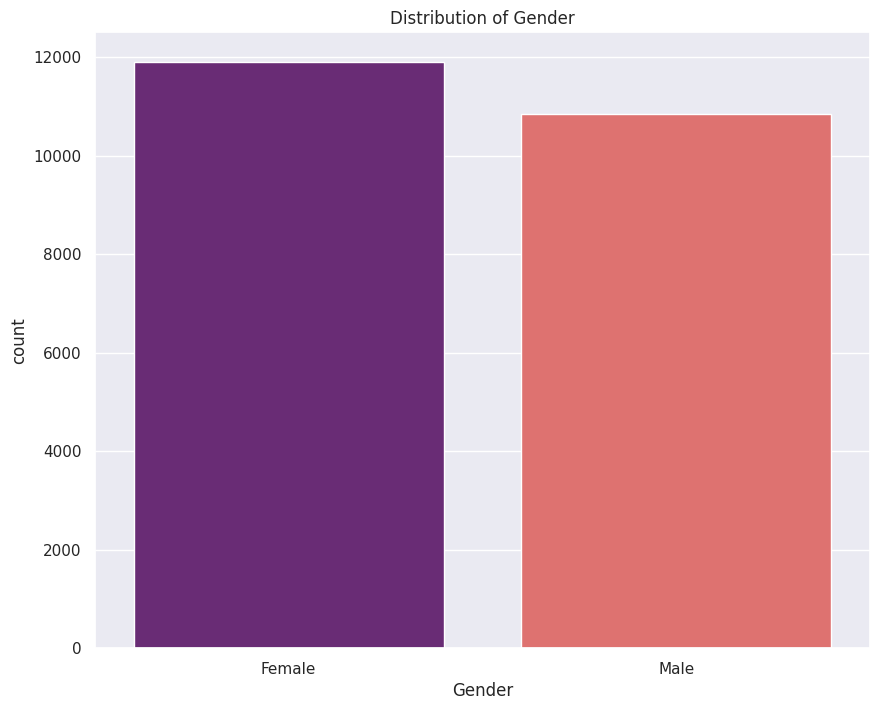

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 8))
sns.countplot(x="Gender", data=data, palette='magma')
plt.title("Distribution of Gender")
plt.show()


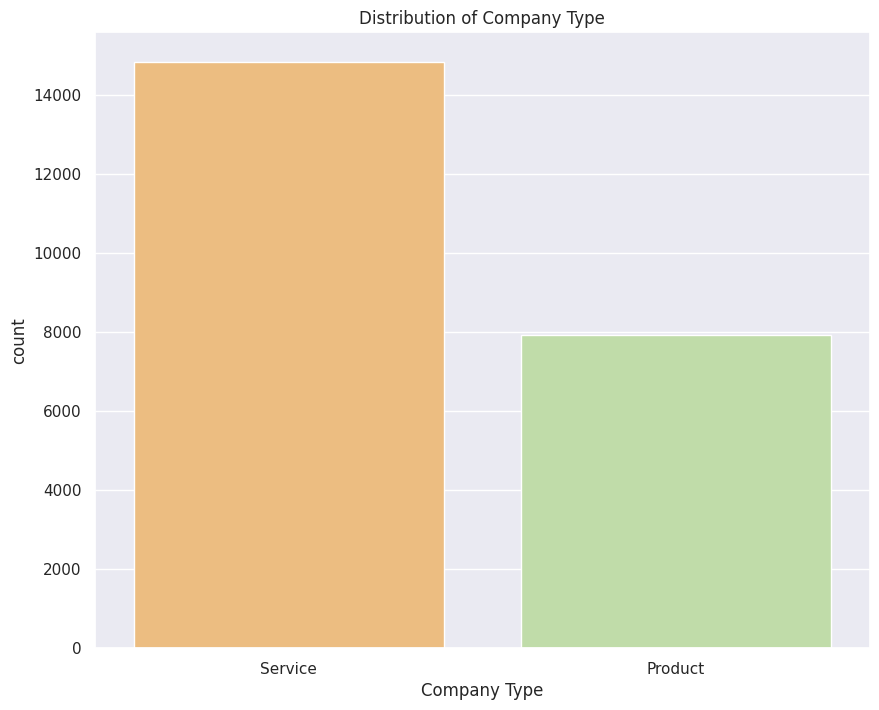

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x="Company Type", data=data, palette="Spectral")
plt.title("Distribution of Company Type")
plt.show()

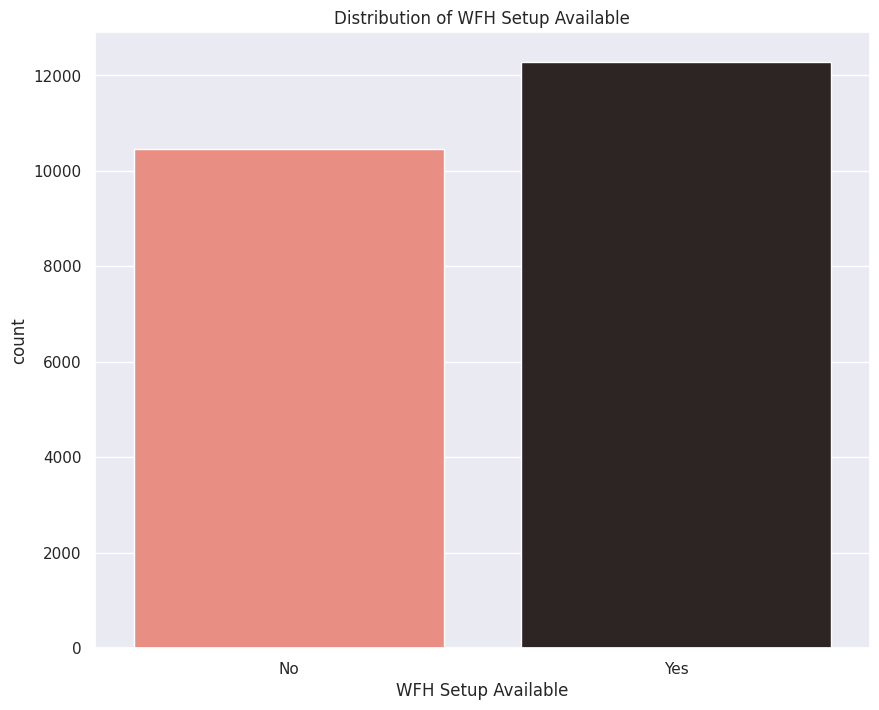

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(x="WFH Setup Available", data=data, palette="dark:salmon_r")
plt.title("Distribution of WFH Setup Available")
plt.show()

In [ ]:
fig = px.line(data,y="Burn Rate",color="Designation",title="Burn rate on the basis of Desgination",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.1)
fig.show()


In [ ]:
fig = px.line(data,y="Burn Rate",color="Gender",title="Burn rate on the basis of Gender",color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()

In [ ]:
fig = px.line(data, y="Mental Fatigue Score", color="Designation", title="Mental Fatigue vs Designation", color_discrete_sequence=px.colors.qualitative.Pastel1)
fig.update_layout(bargap=0.2)
fig.show()


In [ ]:
data['Gender Label']=Label_encode.fit_transform(data['Gender'].values)
data['Company_TypeLablel']=Label_encode.fit_transform(data['Company Type'].values)
data['WFH_Setup_Available']=Label_encode.fit_transform(data['WFH Setup Available'].values)

NameError: ignored

In [ ]:
gn =data.groupby('Gender')
gn = gn['Gender']
gn.first()


In [ ]:
data.head()

In [ ]:
ct = data.groupby('Company Type')
ct = ct['Company Type']
ct.first()


In [ ]:
wsa = data.groupby("WFH Setup Available")
wsa = wsa["WFH Setup Available"]
wsa.first()

In [ ]:
data.tail()

In [ ]:
columns = ["Designation", "Resource Allocation", "Mental Fatigue Score", "Gender", "Company Type", "WFH Setup Available"]
x = data[columns]
y = data["Burn Rate"]

In [ ]:
print(x)

In [ ]:
print(y)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
x_pca = pca.fit_transform(x_pca)

print("PCA shape of x is", x_pca.shape, "and original shape is:", x.shape)
print("% of importance of selected features is:", pca.explained_variance_ratio_)
print("The number of features selected through PCA is:", pca.n_components_)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,test_size=0.25,random_state=10)

In [ ]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

In [ ]:
model.fit(x_train,y_train)